# Run the whole deltas algorithm

In [33]:
%load_ext autoreload
%autoreload 2

import ipywidgets
from deltas.pipeline import data, classifier, evaluation
from deltas.model import base, downsample
import deltas.plotting.plots as plots

import numpy as np
np.random.seed(10)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [34]:
N1 = 100
N2 = 100
m = 1
costs = (1, 1000000)  # change for (1, 10) to increase results
# Gaussian (not always seperable)
data_clf = data.get_data(
    m1=[-m, -m],
    m2=[m, m],
    cov1=[[1, 0], [0, 1]],
    cov2=[[1, 0], [0, 1]],
    N1=N1,
    N2=N2,
    scale=True
    )

## Get Classifier

Original


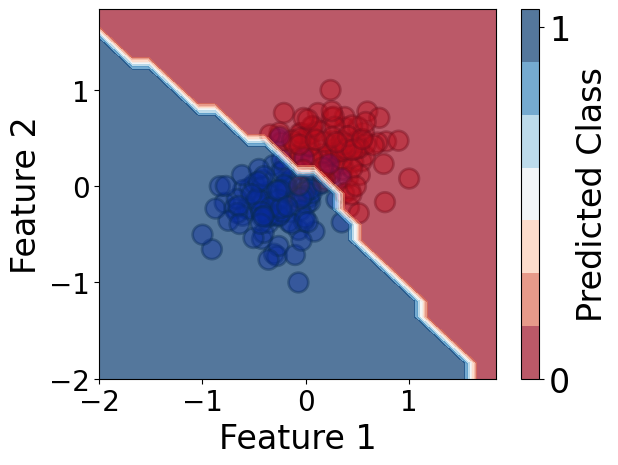

SMOTE


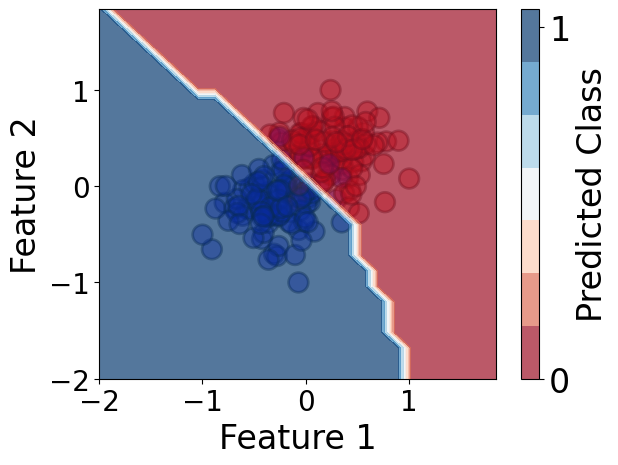

Balanced Weights


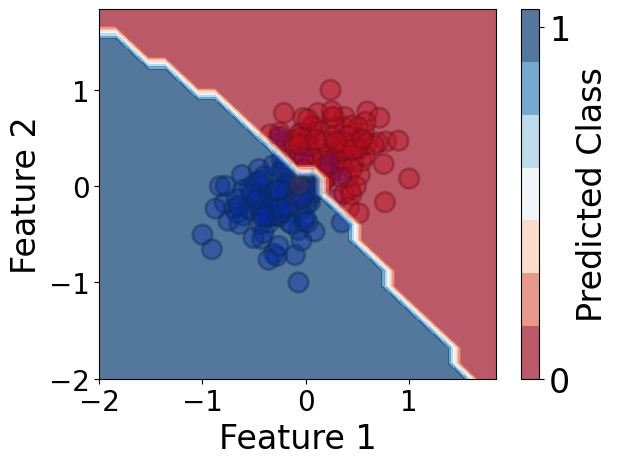

Bayes Minimum Risk (calibrated)


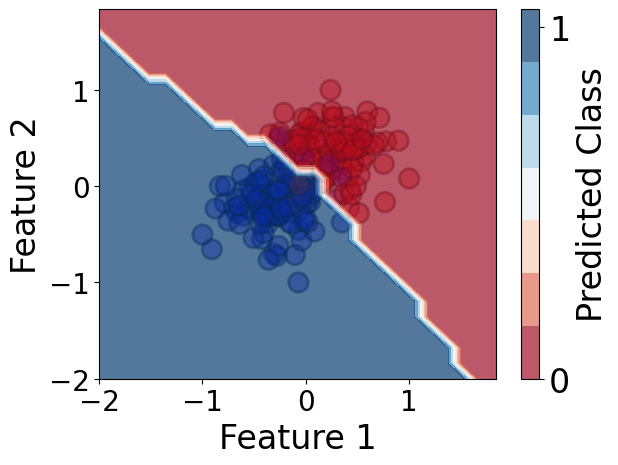

Bayes Minimum Risk


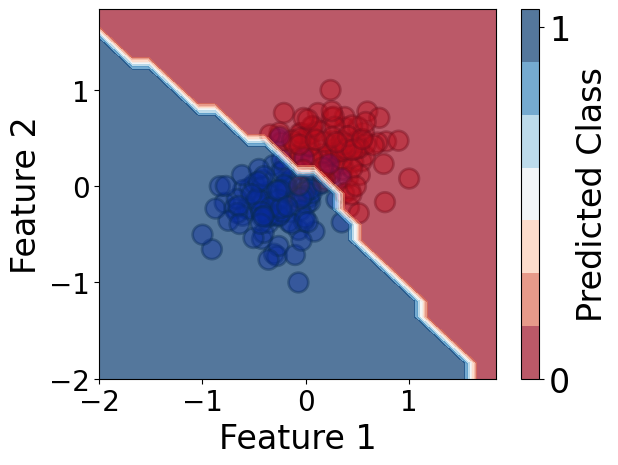

Thresholding


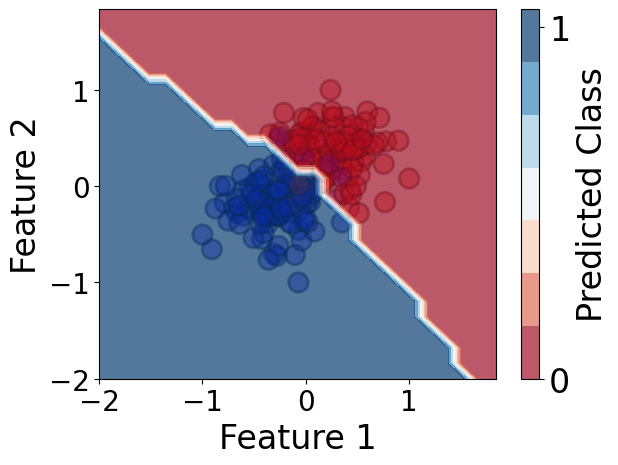

In [35]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
model = 'MLP'

classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model)
data_clf['clf'] = classifiers_dict['Original']                    

## Fit deltas

Original Data


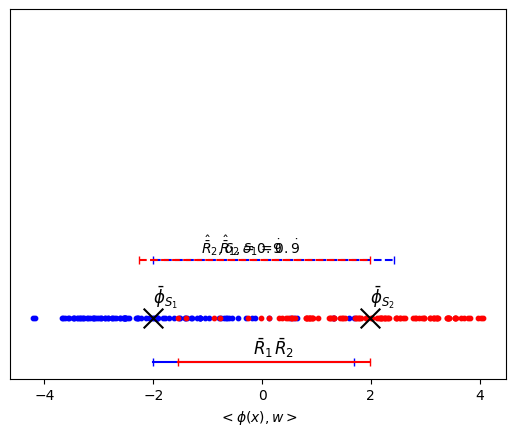

Budget 100 found 69 viable downsampled solutions
Best solution found by removing 37 data points
Downsampled Data:


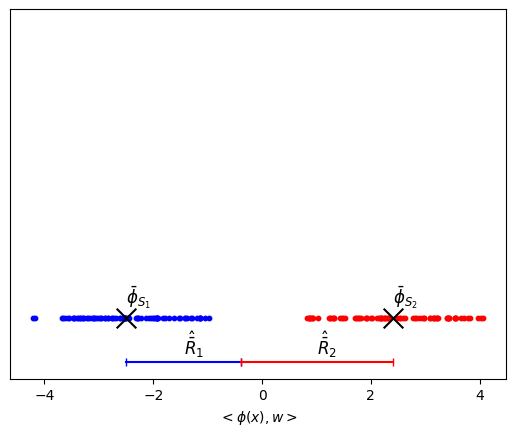

In [36]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = downsample.downsample_deltas(
#     clf).fit(X, y, _print=True, _plot=True, max_trials=10000)
# deltas_model = base.base_deltas(
#     clf).fit(X, y, grid_search=True, _print=True, _plot=True)
deltas_model = downsample.downsample_deltas(
    clf).fit(X, y, costs=costs, _print=True, _plot=True, grid_search=True)

## Plot training data information

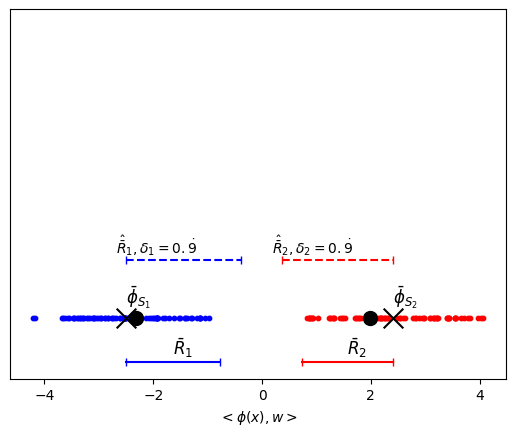

In [37]:
deltas_model.plot_data(data_clf)

## See how classifier's boudnary changes with delta

In [38]:
@ipywidgets.interact_manual(
    delta2=(0.00001, 1., 0.00001),
)
def plot(delta2=1):
    ax, _ = plots._get_axes(None)
    plots.plot_classes(data_clf['data'], ax=ax)
    def pred_func(X): return deltas_model._predict_given_delta2(X, delta2)
    plots.plot_decision_boundary_custom_pred(
        pred_func, data_clf['data'], ax=ax, probs=False)
    ax.set_title(f'delta_class0 = {delta2}')
    plots.plt.show()

interactive(children=(FloatSlider(value=1.0, description='delta2', max=1.0, min=1e-05, step=1e-05), Button(des…

## Show parameters

In [39]:
deltas_model.print_params()

Parameters
                R:  4.219740249475696
                N1: 81
                N2: 82
                R1: 1.7233051825766625
                R2: 1.6675553206233684
                M:  1.5080687140231905
                D:  4.8989292172232215
                C1: 1
                C2: 1000000


# Evaluation on test data

                                 Accuracy    G-Mean  ROC-AUC        F1
Method                                                                
Original                          0.91720  0.916719  0.91720  0.914666
SMOTE                             0.91895  0.918609  0.91895  0.916868
Balanced Weights                  0.91810  0.917667  0.91810  0.915723
Bayes Minimum Risk (calibrated)   0.91800  0.917676  0.91800  0.915949
Bayes Minimum Risk                0.91720  0.916719  0.91720  0.914666
Thresholding                      0.91935  0.919118  0.91935  0.917649
Our Method                        0.92115  0.921058  0.92115  0.922166 


Original


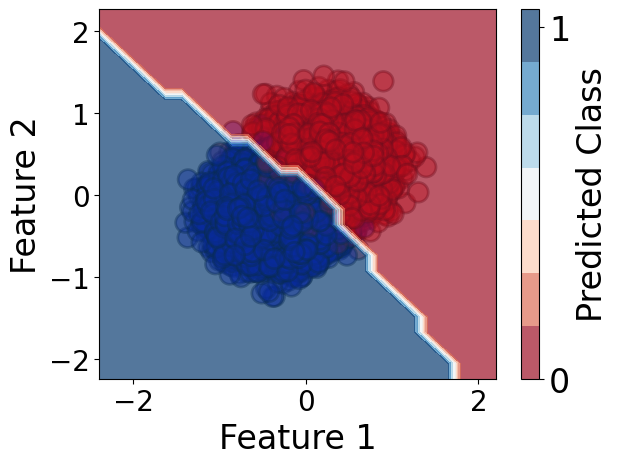

SMOTE


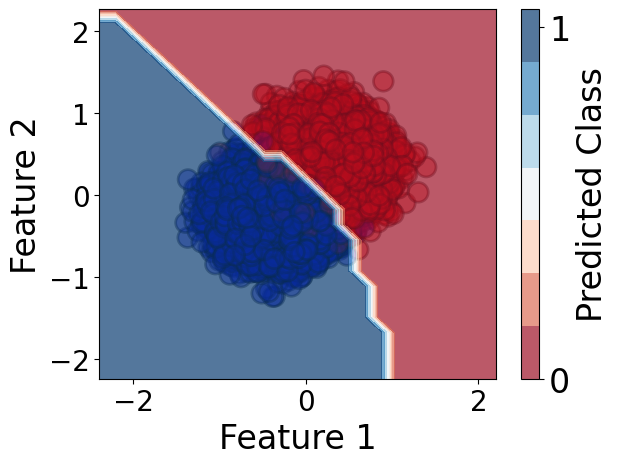

Balanced Weights


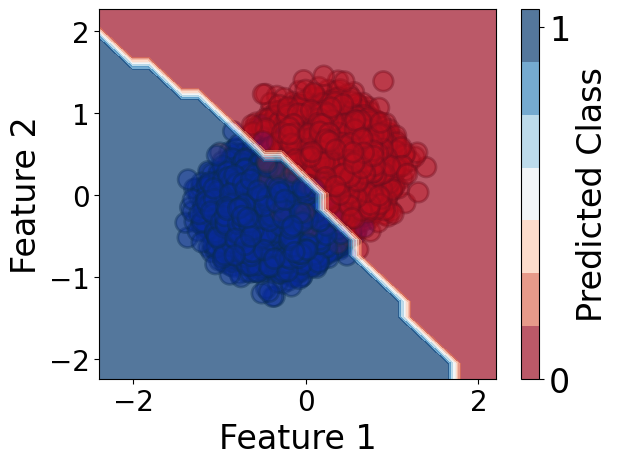

Bayes Minimum Risk (calibrated)


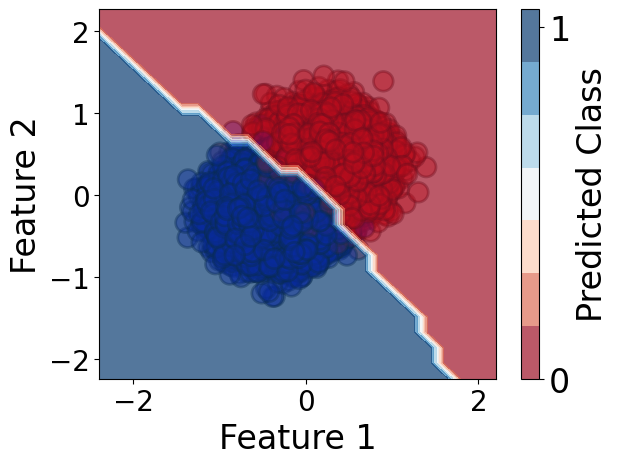

Bayes Minimum Risk


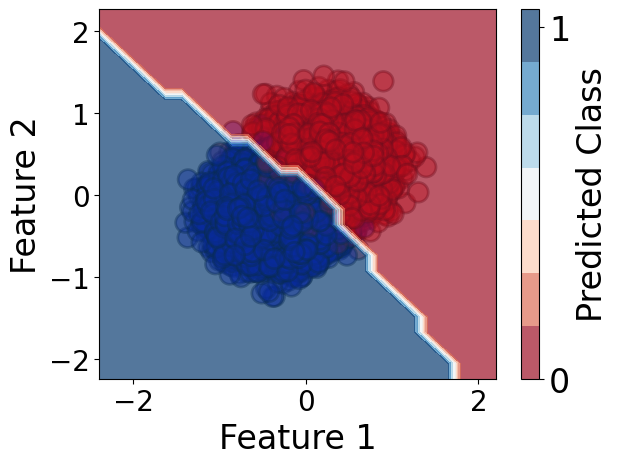

Thresholding


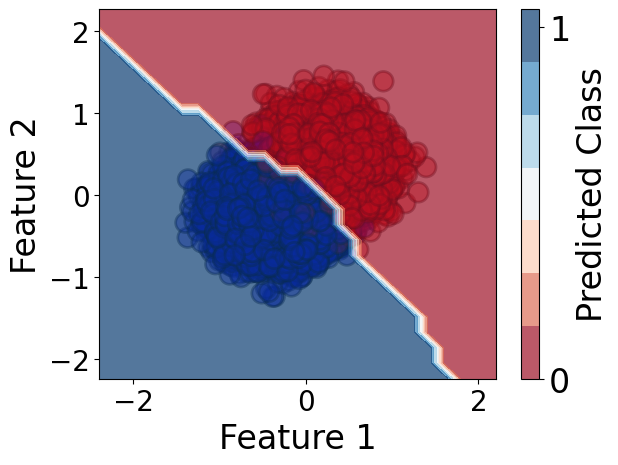

Our Method


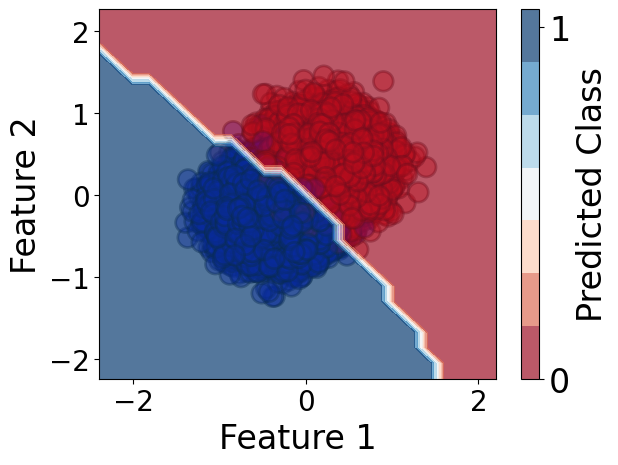

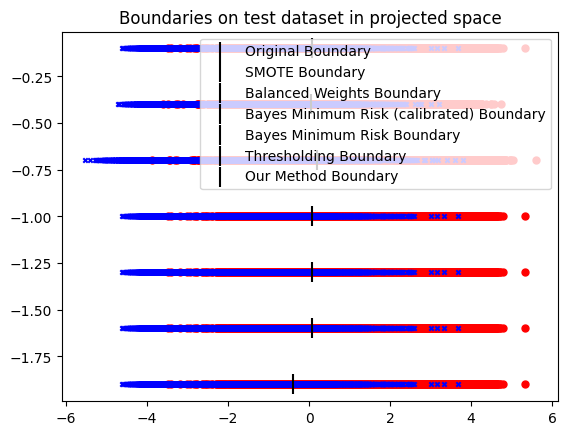

LATEX table format


\begin{tabular}{lrrrr}
 & Accuracy & G-Mean & ROC-AUC & F1 \\
Method &  &  &  &  \\
Original & 0.9172 & 0.9167 & 0.9172 & 0.9147 \\
SMOTE & 0.9190 & 0.9186 & 0.9189 & 0.9169 \\
Balanced Weights & 0.9181 & 0.9177 & 0.9181 & 0.9157 \\
Bayes Minimum Risk (calibrated) & 0.9180 & 0.9177 & 0.9180 & 0.9159 \\
Bayes Minimum Risk & 0.9172 & 0.9167 & 0.9172 & 0.9147 \\
Thresholding & 0.9194 & 0.9191 & 0.9194 & 0.9176 \\
Our Method & 0.9212 & 0.9211 & 0.9212 & 0.9222 \\
\end{tabular}



,Accuracy,G-Mean,ROC-AUC,F1
Method,,,,
Original,0.91720,0.916719,0.91720,0.914666
SMOTE,0.91895,0.918609,0.91895,0.916868
Balanced Weights,0.91810,0.917667,0.91810,0.915723
Bayes Minimum Risk (calibrated),0.91800,0.917676,0.91800,0.915949
Bayes Minimum Risk,0.91720,0.916719,0.91720,0.914666
Thresholding,0.91935,0.919118,0.91935,0.917649
Our Method,0.92115,0.921058,0.92115,0.922166


In [40]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict,
                       data_clf['data_test'], _print=True, _plot=True)